# 4章データの表現と特徴量エンジニアリング

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import mglearn

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=100)

X.shape

(100, 1)

In [3]:
X, y

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547],
        [-2.87649303],
        [ 2.81945911],
        [ 1.99465584],
        [-1.72596534],
        [-1.9090502 ],
        [-1.89957294],
        [-1.17454654],
        [ 0.14853859],
        [-0.40832989],
        [-1.25262516],
        [ 0.67111737],
        [-2.16303684],
        [-1.24713211],
        [-0.80182894],
        [-0.26358009],
        [ 1.71105577],
        [-1.80195731],
        [ 0.08540663],
        [ 0.55448741],
        [-2.72129752],
        [ 0.64526911],
        [-1.97685526],
        [-2.60969044],
        [ 2.69331322],
        [ 2.7937922 ],
        [ 1.85038409],
        [-1.17231738],
        [-2.41396732],
        [ 1.10539816],
        [-0.35908504],
        [-2.26777059],
        [-0.02893854],
        [-2.79366887],
        [ 2

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
X_poly.shape

(100, 10)

In [5]:
X_poly[:6]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [6]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

In [7]:
poly.degree

10

In [8]:
poly.get_params()

{'degree': 10, 'include_bias': False, 'interaction_only': False}

# 4.4 単変量非線形変換

In [9]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w= rnd.normal(size=3)

In [10]:
X_org[:6]

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826]])

In [11]:
X_org.shape

(1000, 3)

In [12]:
w

array([ 1.59327362,  0.5687224 , -0.11448705])

In [13]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
X[:6], y[:6]

(array([[56, 18, 27],
        [81, 57,  3],
        [25,  9, 11],
        [20, 13, 30],
        [27, 13, 13],
        [18, 46,  7]]),
 array([2.92614361, 4.74436373, 1.4394878 , 0.56962109, 1.23092405,
        1.4048387 ]))

In [14]:
np.bincount(X[:, 0])

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1])

Text(0.5,0,'Value')

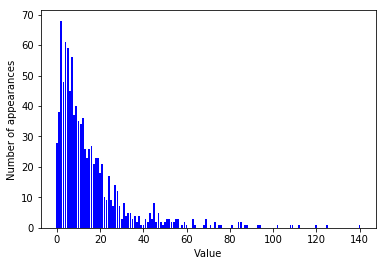

In [15]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

# 4.5 自動特徴量選択

# 4.5.1 単変量統計

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print(cancer.data.shape)

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
print(len(cancer.data))
print(noise.shape)

X_w_noise = np.hstack([cancer.data, noise])
print(X_w_noise.shape)
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, 
                                                    random_state=0,
                                                   test_size=.5)
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_train_selected.shape

(569, 30)
569
(569, 50)
(569, 80)


(284, 40)

In [17]:
mask = select.get_support()
mask.shape

(80,)

In [18]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False, False, False, False])

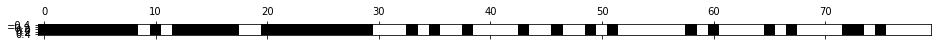

In [19]:
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [20]:
mask.reshape(1,-1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False,  True, False,  True,
        False, False,  True, False, False, False, False,  True, False,
        False,  True, False, False,  True, False,  True, False, False,
        False, False, False, False,  True, False,  True, False, False,
        False, False,  True, False,  True, False, False, False, False,
         True,  True, False,  True, False, False, False, False]])

In [21]:
mask.reshape(-1, 1)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

In [23]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
poly_transformer

PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

In [34]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

citibike = mglearn.datasets.load_citibike()
print(citibike.index.hour)
X_hour_week = np.hstack([citibike.index.dayofweek.reshape(-1, 1),
                         citibike.index.hour.reshape(-1, 1)])

X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Int64Index([ 0,  3,  6,  9, 12, 15, 18, 21,  0,  3,
            ...
            18, 21,  0,  3,  6,  9, 12, 15, 18, 21],
           dtype='int64', name='starttime', length=248)


NotImplementedError: reshaping is not supported for Index objects

In [36]:
citibike.index.hour.reshape(-1, 1)

NotImplementedError: reshaping is not supported for Index objects